INF8770 Technologies multimédias

Polytechnique Montréal

Exemple de détection de la peau par la méthode Gaussienne sur le rouge et le vert.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

Lecture d'une image d'échantillons de peau.

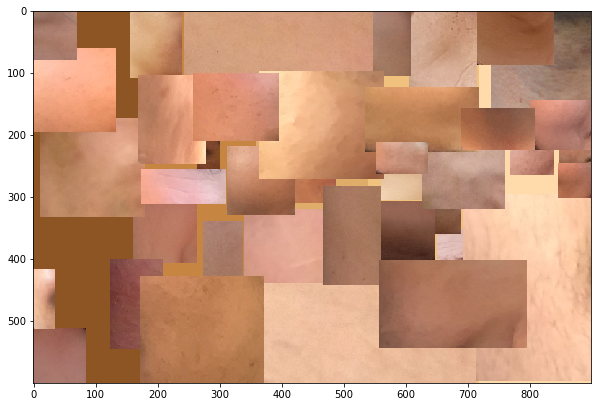

In [2]:
plt.figure(figsize = (10,10))
#Vous pouvez aussi essayer avec EchPeau2.jpg. Les peaux foncées sont mieux détectées.
image = plt.imread('EchPeau.jpg')  
plt.imshow(image)
plt.show()

Calcul et affichage de l'histogramme R,G

In [3]:
Taille = len(image)*len(image[0])
Vec1 = np.zeros(Taille)
Vec2 = np.zeros(Taille)
k=0
for i in range(len(image)):
    for j in range(len(image[0])):
        Vec1[k]=image[i][j][0]
        Vec2[k]=image[i][j][1]
        k+=1

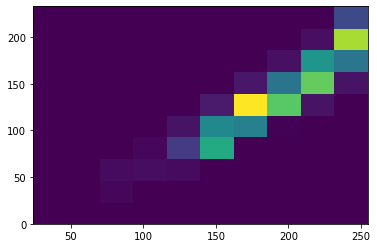

In [4]:
plt.hist2d(Vec1, Vec2)
plt.show()

On calcule les paramètres de la distribution Gaussienne sur R et G.

In [5]:
sommeR = 0.0
sommeG = 0.0
#Mu, la moyenne des R et G
for i in range(len(image)):
    for j in range(len(image[0])):
        sommeR=sommeR+image[i][j][0]
        sommeG=sommeG+image[i][j][1]
        
nbPixels = len(image)*len(image[0])        
MoyR= sommeR / nbPixels
MoyG= sommeG / nbPixels
mu = np.array([MoyR, MoyG])

print('mu:',mu)

#La covariance des R et G
covRG = np.zeros((2,2), dtype = "double")
for i in range(len(image)):
    for j in range(len(image[0])):
        vecTemp=[[image[i][j][0] - MoyR], [image[i][j][1]] - MoyG]
        vecProdTemp = np.dot(vecTemp,np.transpose(vecTemp))
        covRG = np.add(covRG,vecProdTemp)

covRG = covRG / nbPixels
print('covariance:',covRG)

mu: [194.99281481 140.83712037]
covariance: [[1444.98644097 1391.48622042]
 [1391.48622042 1449.173298  ]]


Affichage de la distribution

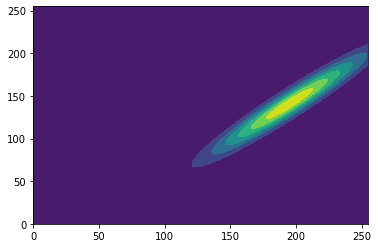

In [6]:
x, y = np.mgrid[0:256:1, 0:256:1]
pos = np.empty(x.shape + (2,))
pos[:, :, 0] = x; pos[:, :, 1] = y
rv = multivariate_normal(mu, covRG)
plt.contourf(x, y, rv.pdf(pos))
plt.show()

On teste la détection sur des couleurs de peau claires.

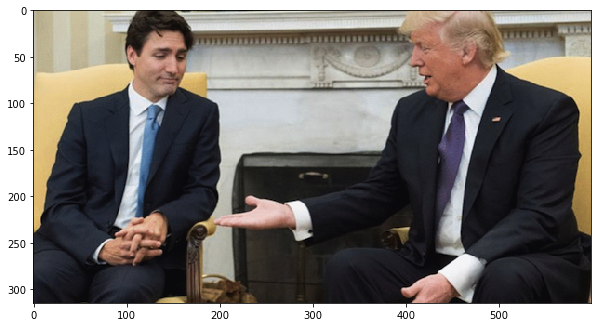

In [7]:
plt.figure(figsize = (10,10))
image2 = plt.imread('Trudeau.jpg')
plt.imshow(image2)
plt.show()

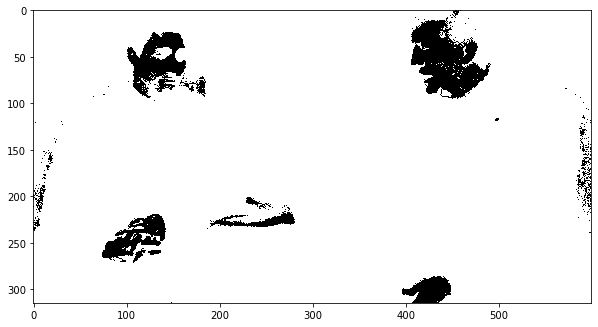

In [8]:
# Détection
res = np.zeros((len(image2),len(image2[0])))
for i in range(len(image2)):
    for j in range(len(image2[0])):
        #Calcul de la probabilité (de faire partie de la distribution) de chaque pixel
        res[i,j] = rv.pdf([image2[i][j][0],image2[i][j][1]]) 
        
Peau = res>0.00008  # Seuil trouvé manuellement
plt.figure(figsize = (10,10))
plt.imshow(Peau, plt.get_cmap('binary'))
plt.show()

Testons aussi avec une couleur de peau plus foncée.

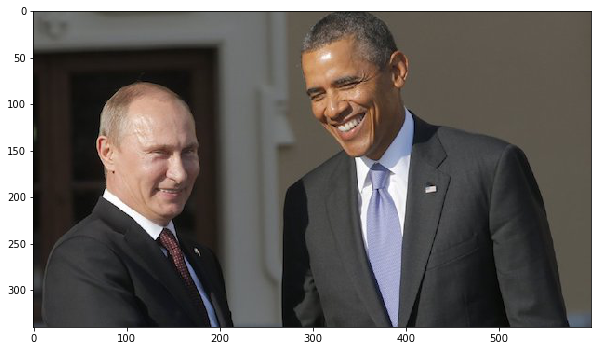

In [9]:
plt.figure(figsize = (10,10))
image2 = plt.imread('Obama.jpg')
plt.imshow(image2)
plt.show()

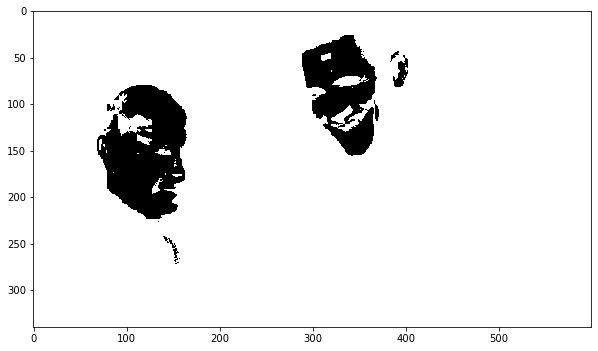

In [10]:
res = np.zeros((len(image2),len(image2[0])))
for i in range(len(image2)):
    for j in range(len(image2[0])):
        res[i,j] = rv.pdf([image2[i][j][0],image2[i][j][1]])

Peau = res>0.00001
plt.figure(figsize = (10,10))
plt.imshow(Peau, plt.get_cmap('binary'))
plt.show()       